<a href="https://colab.research.google.com/github/Larasati11/PCVK/blob/main/Modul9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import cv2
import numpy as np
from matplotlib import pyplot as plt

Mounted at /content/drive


3. Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element
Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
morphology.png)


(<Axes: title={'center': 'Citra Hasil Dilasi'}>,
 Text(0.5, 1.0, 'Citra Hasil Dilasi'))

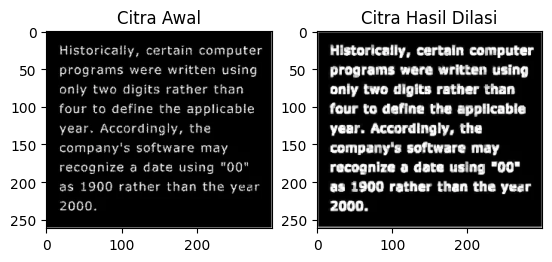

In [4]:
img = cv2.imread('/content/drive/MyDrive/morphology.png')

kernel = np.ones((3,3), np.uint8)
dilation = cv2.dilate(img, kernel, iterations = 1)

plt.subplot(121),plt.imshow(img),plt.title('Citra Awal')
plt.subplot(122),plt.imshow(dilation),plt.title('Citra Hasil Dilasi')

4. Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED)
berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
morphology.png, dan cetak Structuring Element-nya)

Structuring Element (Cross 3x3):
 [[0 1 0]
 [1 1 1]
 [0 1 0]]


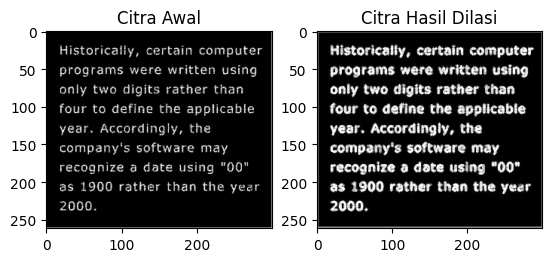

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar
img = cv2.imread('/content/drive/MyDrive/morphology.png')

# Membuat Structuring Element berbentuk cross (3x3)
cross_kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

# Mencetak Structuring Element
print("Structuring Element (Cross 3x3):\n", cross_kernel)

# Melakukan operasi dilasi menggunakan Structuring Element cross
dilation = cv2.dilate(img, cross_kernel, iterations=1)

# Menampilkan gambar asli dan hasil dilasi
plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(cv2.cvtColor(dilation, cv2.COLOR_BGR2RGB)), plt.title('Citra Hasil Dilasi')
plt.show()


5.  Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element
Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
j.png)


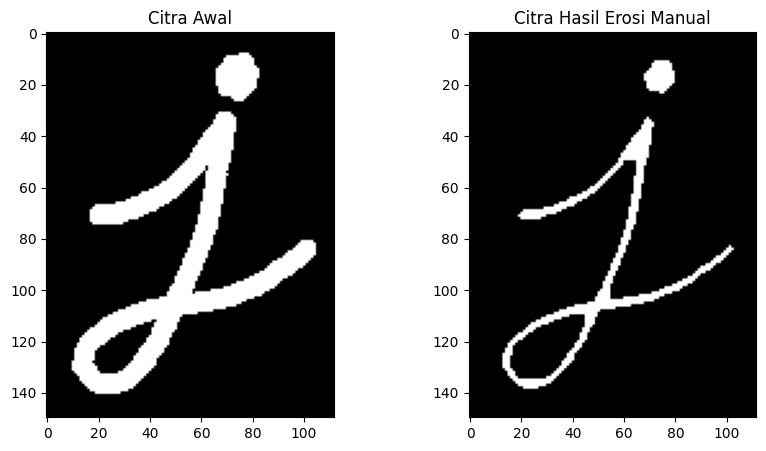

In [12]:
def manual_erosion(image, kernel):
    # Dapatkan ukuran gambar dan kernel
    img_height, img_width = image.shape[:2]
    kernel_height, kernel_width = kernel.shape

    # Hitung padding
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    # Tambahkan padding ke gambar
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)

    # Inisialisasi gambar output
    output = np.zeros_like(image)

    # Melakukan operasi erosi
    for y in range(img_height):
        for x in range(img_width):
            # Ambil region dari gambar yang sesuai dengan ukuran kernel
            region = padded_image[y:y + kernel_height, x:x + kernel_width]
            # Erosi: jika semua nilai dalam region lebih besar atau sama dengan kernel
            if np.all(region >= kernel):
                output[y, x] = 255  # Set piksel ke putih
            else:
                output[y, x] = 0    # Set piksel ke hitam

    return output

# Memuat gambar
img = cv2.imread('/content/drive/MyDrive/j.png')

# Pastikan gambar berhasil dimuat
if img is None:
    print("Error: Gambar tidak ditemukan atau tidak dapat dimuat.")
else:
    # Mengonversi gambar ke grayscale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Membuat Structuring Element berbentuk square (5x5)
    square_kernel = np.ones((5, 5), np.uint8)

    # Melakukan operasi erosi secara manual
    erosion_manual = manual_erosion(img_gray, square_kernel)

    # Menampilkan gambar asli dan hasil erosi
    plt.figure(figsize=(10, 5))
    plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Citra Awal')
    plt.subplot(122), plt.imshow(erosion_manual, cmap='gray'), plt.title('Citra Hasil Erosi Manual')
    plt.show()


6.  Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk
square 5 x 5 dengan menggunakan library morphology dari openCV, sehingga
menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)

(<Axes: title={'center': 'Citra Hasil Erosi'}>,
 Text(0.5, 1.0, 'Citra Hasil Erosi'))

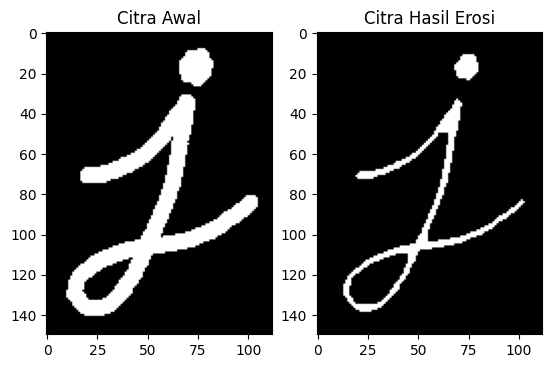

In [13]:
img = cv2.imread('/content/drive/MyDrive/j.png')

kernel = np.ones((5,5), np.uint8)
erosion = cv2.morphologyEx(img, cv2.MORPH_ERODE, kernel)

plt.subplot(121), plt.imshow(img), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(erosion), plt.title('Citra Hasil Erosi')

7. Buatlah program implementasi operasi opening dengan Structuring Element
berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
fingerprint.png)

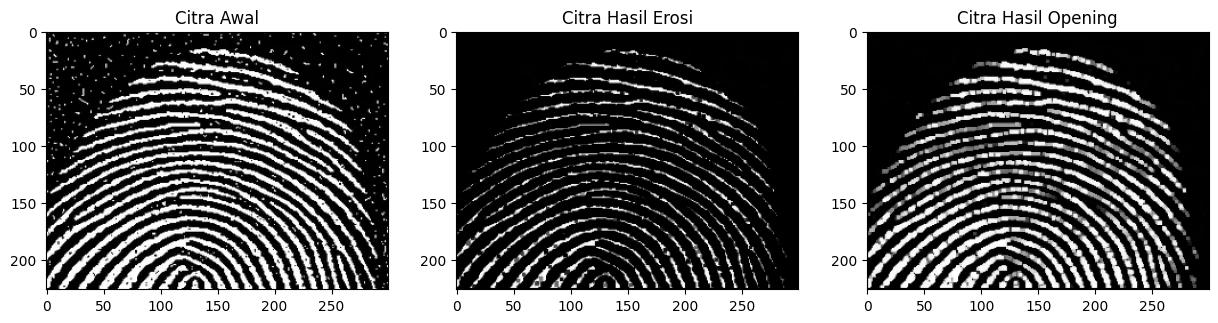

In [19]:
def erosi_citra(F, w):
    height, width = F.shape
    image_erosi = np.zeros((height, width), dtype=np.uint8)

    # Generate structure element (square w x w)
    structure_element = np.ones((w, w), dtype=np.uint8)
    constant = (w - 1) // 2

    # Melakukan proses erosi
    for i in range(constant, height - constant):
        for j in range(constant, width - constant):
            temp = F[i-constant:i+constant+1, j-constant:j+constant+1]
            eroded_value = np.min(temp * structure_element)
            image_erosi[i, j] = eroded_value

    return image_erosi

def opening_citra(F, w):
    # Proses Opening: Erosi diikuti oleh Dilasi
    eroded_image = erosi_citra(F, w)
    dilated_image = dilasi_citra(eroded_image, w)
    return dilated_image

def dilasi_citra(F, w):
    height, width = F.shape
    image_dilasi = np.zeros((height, width), dtype=np.uint8)

    # Generate structure element (square w x w)
    structure_element = np.ones((w, w), dtype=np.uint8)
    constant = (w - 1) // 2

    # Melakukan proses dilasi
    for i in range(constant, height - constant):
        for j in range(constant, width - constant):
            temp = F[i-constant:i+constant+1, j-constant:j+constant+1]
            image_dilasi[i, j] = np.max(temp * structure_element)

    return image_dilasi

# Membaca gambar dalam mode grayscale
image = cv2.imread('/content/drive/MyDrive/fingerprint.png', cv2.IMREAD_GRAYSCALE)

# Ukuran structuring element
w = 3

# Hasil erosi dan opening
hasil_erosi = erosi_citra(image, w)
hasil_opening = opening_citra(image, w)

# Menampilkan hasil
plt.figure(figsize=(15, 5))

# Gambar asli
plt.subplot(1, 3, 1)
plt.title('Citra Awal')
plt.imshow(image, cmap='gray')

# Gambar hasil erosi
plt.subplot(1, 3, 2)
plt.title('Citra Hasil Erosi')
plt.imshow(hasil_erosi, cmap='gray')

# Gambar hasil opening
plt.subplot(1, 3, 3)
plt.title('Citra Hasil Opening')
plt.imshow(hasil_opening, cmap='gray')

plt.show()

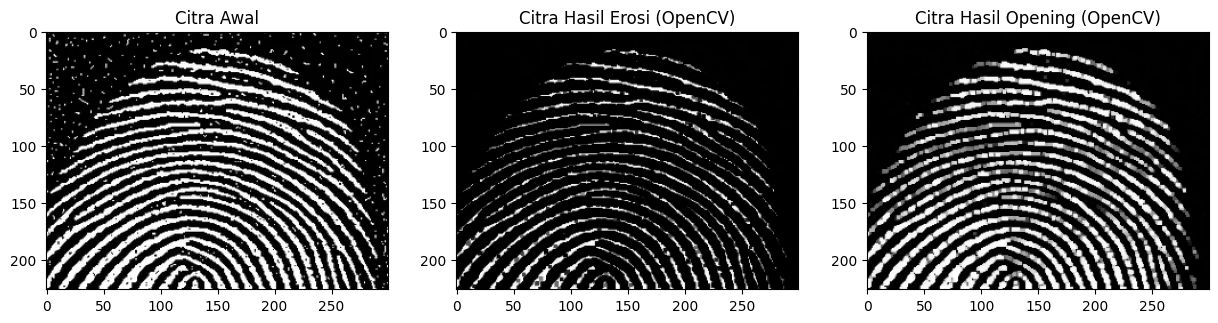

In [21]:
# Membaca gambar dalam mode grayscale
img = cv2.imread('/content/drive/MyDrive/fingerprint.png', cv2.IMREAD_GRAYSCALE)

# Membuat Structuring Element (SE) berbentuk square 3x3
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Melakukan operasi erosi menggunakan morphology dari OpenCV
erosi_opencv = cv2.erode(img, kernel)

# Melakukan operasi opening menggunakan morphology dari OpenCV
opening_opencv = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

# Menampilkan hasil
plt.figure(figsize=(15, 5))

# Gambar asli
plt.subplot(1, 3, 1)
plt.title('Citra Awal')
plt.imshow(img, cmap='gray')

# Gambar hasil erosi
plt.subplot(1, 3, 2)
plt.title('Citra Hasil Erosi (OpenCV)')
plt.imshow(erosi_opencv, cmap='gray')

# Gambar hasil opening
plt.subplot(1, 3, 3)
plt.title('Citra Hasil Opening (OpenCV)')
plt.imshow(opening_opencv, cmap='gray')

plt.show()

8. Buatlah program implementasi operasi closing dengan Structuring Element berbentuk
square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
fingerprint.png)

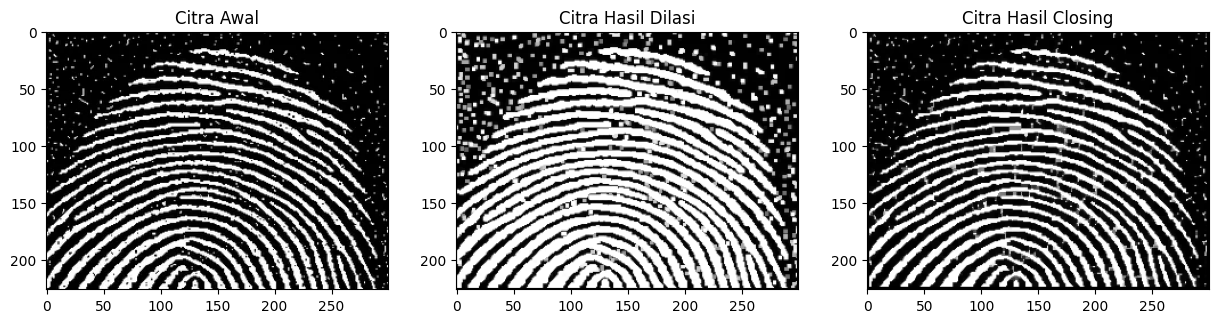

In [23]:
def dilasi_citra(F, w):
    height, width = F.shape
    image_dilasi = np.zeros((height, width), dtype=np.uint8)

    # Generate structure element (square w x w)
    structure_element = np.ones((w, w), dtype=np.uint8)
    constant = (w - 1) // 2

    # Melakukan proses dilasi
    for i in range(constant, height - constant):
        for j in range(constant, width - constant):
            temp = F[i-constant:i+constant+1, j-constant:j+constant+1]
            image_dilasi[i, j] = np.max(temp * structure_element)

    return image_dilasi

def closing_citra(F, w):
    # Proses Closing: Dilasi diikuti oleh Erosi
    dilated_image = dilasi_citra(F, w)
    eroded_image = erosi_citra(dilated_image, w)
    return eroded_image

def erosi_citra(F, w):
    height, width = F.shape
    image_erosi = np.zeros((height, width), dtype=np.uint8)

    # Generate structure element (square w x w)
    structure_element = np.ones((w, w), dtype=np.uint8)
    constant = (w - 1) // 2

    # Melakukan proses erosi
    for i in range(constant, height - constant):
        for j in range(constant, width - constant):
            temp = F[i-constant:i+constant+1, j-constant:j+constant+1]
            eroded_value = np.min(temp * structure_element)
            image_erosi[i, j] = eroded_value

    return image_erosi

# Membaca gambar dalam mode grayscale
image = cv2.imread('/content/drive/MyDrive/fingerprint.png', cv2.IMREAD_GRAYSCALE)

# Ukuran structuring element
w = 3

# Hasil dilasi dan closing
hasil_dilasi = dilasi_citra(image, w)
hasil_closing = closing_citra(image, w)

# Menampilkan hasil
plt.figure(figsize=(15, 5))

# Gambar asli
plt.subplot(1, 3, 1)
plt.title('Citra Awal')
plt.imshow(image, cmap='gray')

# Gambar hasil dilasi
plt.subplot(1, 3, 2)
plt.title('Citra Hasil Dilasi')
plt.imshow(hasil_dilasi, cmap='gray')

# Gambar hasil closing
plt.subplot(1, 3, 3)
plt.title('Citra Hasil Closing')
plt.imshow(hasil_closing, cmap='gray')

plt.show()


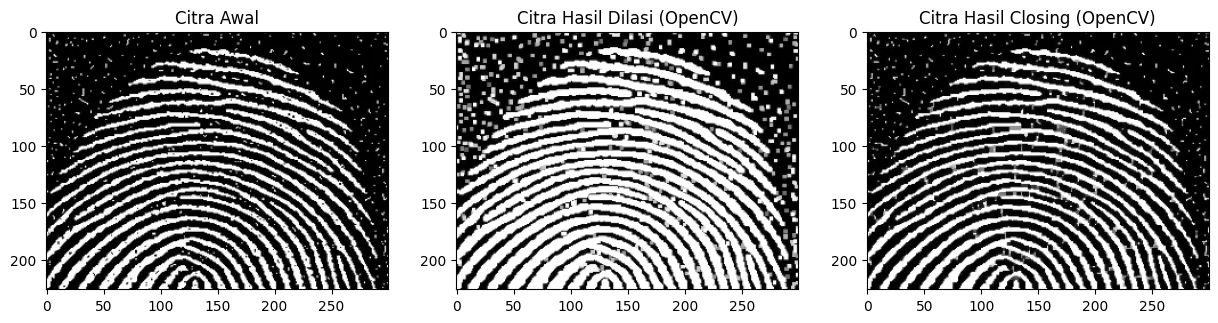

In [24]:
# Membaca gambar dalam mode grayscale
img = cv2.imread('/content/drive/MyDrive/fingerprint.png', cv2.IMREAD_GRAYSCALE)

# Membuat Structuring Element (SE) berbentuk square 3x3
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Melakukan operasi dilasi menggunakan morphology dari OpenCV
dilasi_opencv = cv2.dilate(img, kernel)

# Melakukan operasi closing menggunakan morphology dari OpenCV
closing_opencv = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

# Menampilkan hasil
plt.figure(figsize=(15, 5))

# Gambar asli
plt.subplot(1, 3, 1)
plt.title('Citra Awal')
plt.imshow(img, cmap='gray')

# Gambar hasil dilasi
plt.subplot(1, 3, 2)
plt.title('Citra Hasil Dilasi (OpenCV)')
plt.imshow(dilasi_opencv, cmap='gray')

# Gambar hasil closing
plt.subplot(1, 3, 3)
plt.title('Citra Hasil Closing (OpenCV)')
plt.imshow(closing_opencv, cmap='gray')

plt.show()


9.  Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Cross 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan
gambar j.png)


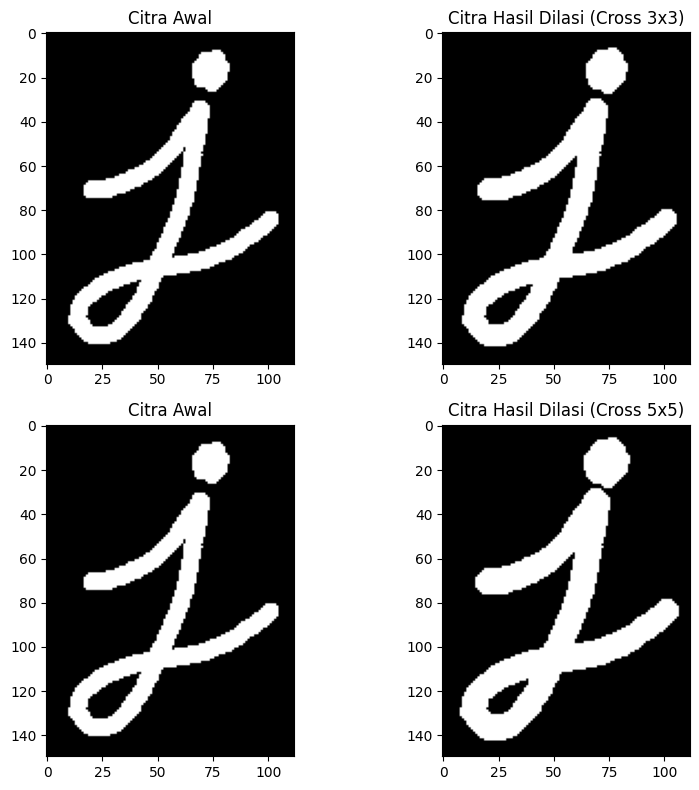

In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar dalam format grayscale
img = cv2.imread('/content/drive/MyDrive/j.png', cv2.IMREAD_GRAYSCALE)

# Membuat Structuring Element berbentuk Cross 3x3
cross_kernel_3x3 = np.array([[0, 1, 0],
                             [1, 1, 1],
                             [0, 1, 0]], dtype=np.uint8)

# Membuat Structuring Element berbentuk Cross 5x5
cross_kernel_5x5 = np.array([[0, 0, 1, 0, 0],
                             [0, 1, 1, 1, 0],
                             [1, 1, 1, 1, 1],
                             [0, 1, 1, 1, 0],
                             [0, 0, 1, 0, 0]], dtype=np.uint8)

# Melakukan operasi dilasi dengan Cross 3x3
dilation_cross_3x3 = cv2.dilate(img, cross_kernel_3x3)

# Melakukan operasi dilasi dengan Cross 5x5
dilation_cross_5x5 = cv2.dilate(img, cross_kernel_5x5)

# Menampilkan hasil dengan urutan yang sesuai
plt.figure(figsize=(12, 8))

# Tampilan untuk Cross 3x3
plt.subplot(232), plt.imshow(img, cmap='gray'), plt.title('Citra Awal')
plt.subplot(233), plt.imshow(dilation_cross_3x3, cmap='gray'), plt.title('Citra Hasil Dilasi (Cross 3x3)')

# Tampilan untuk Cross 5x5
plt.subplot(235), plt.imshow(img, cmap='gray'), plt.title('Citra Awal')
plt.subplot(236), plt.imshow(dilation_cross_5x5, cmap='gray'), plt.title('Citra Hasil Dilasi (Cross 5x5)')

plt.tight_layout()
plt.show()


10. . Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Circular 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini:
(Gunakan gambar j.png)

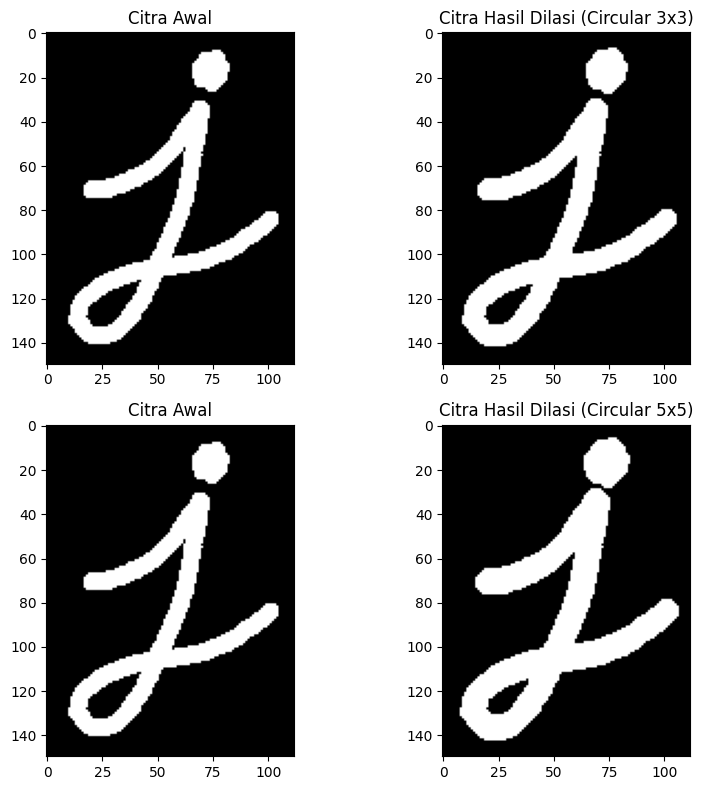

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar dalam format grayscale
img = cv2.imread('/content/drive/MyDrive/j.png', cv2.IMREAD_GRAYSCALE)

# Membuat Structuring Element berbentuk Circular 3x3
circular_kernel_3x3 = np.array([[0, 1, 0],
                                [1, 1, 1],
                                [0, 1, 0]], dtype=np.uint8)

# Membuat Structuring Element berbentuk Circular 5x5
circular_kernel_5x5 = np.array([[0, 0, 1, 0, 0],
                                [0, 1, 1, 1, 0],
                                [1, 1, 1, 1, 1],
                                [0, 1, 1, 1, 0],
                                [0, 0, 1, 0, 0]], dtype=np.uint8)

# Melakukan operasi dilasi dengan Circular 3x3
dilation_circular_3x3 = cv2.dilate(img, circular_kernel_3x3)

# Melakukan operasi dilasi dengan Circular 5x5
dilation_circular_5x5 = cv2.dilate(img, circular_kernel_5x5)

# Menampilkan hasil dengan urutan yang sesuai
plt.figure(figsize=(12, 8))

# Tampilan untuk Circular 3x3
plt.subplot(232), plt.imshow(img, cmap='gray'), plt.title('Citra Awal')
plt.subplot(233), plt.imshow(dilation_circular_3x3, cmap='gray'), plt.title('Citra Hasil Dilasi (Circular 3x3)')

# Tampilan untuk Circular 5x5
plt.subplot(235), plt.imshow(img, cmap='gray'), plt.title('Citra Awal')
plt.subplot(236), plt.imshow(dilation_circular_5x5, cmap='gray'), plt.title('Citra Hasil Dilasi (Circular 5x5)')

plt.tight_layout()
plt.show()


11.  Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Rectangle 3 x 5 dan 5 x 7, sehingga menghasilkan tampilan seperti di bawah ini:
(Gunakan gambar j.png)

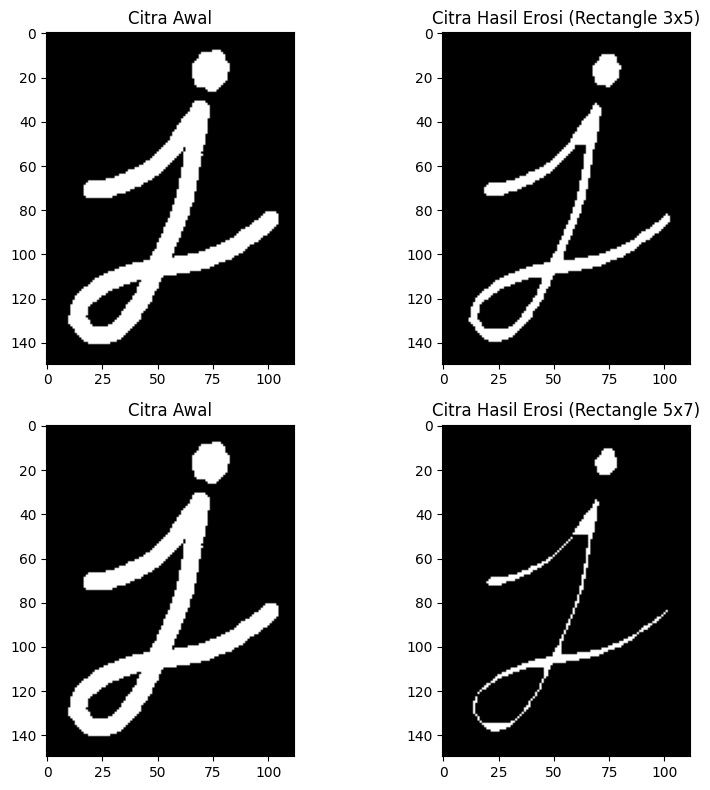

In [43]:
# Membaca gambar dalam format grayscale
img = cv2.imread('/content/drive/MyDrive/j.png', cv2.IMREAD_GRAYSCALE)

# Membuat Structuring Element berbentuk Rectangle 3x5
rect_kernel_3x5 = np.ones((3, 5), dtype=np.uint8)

# Membuat Structuring Element berbentuk Rectangle 5x7
rect_kernel_5x7 = np.ones((5, 7), dtype=np.uint8)

# Melakukan operasi erosi dengan Rectangle 3x5
erosion_rect_3x5 = cv2.erode(img, rect_kernel_3x5)

# Melakukan operasi erosi dengan Rectangle 5x7
erosion_rect_5x7 = cv2.erode(img, rect_kernel_5x7)

# Menampilkan hasil dengan urutan yang sesuai
plt.figure(figsize=(12, 8))

# Tampilan untuk Rectangle 3x5
plt.subplot(232), plt.imshow(img, cmap='gray'), plt.title('Citra Awal')
plt.subplot(233), plt.imshow(erosion_rect_3x5, cmap='gray'), plt.title('Citra Hasil Erosi (Rectangle 3x5)')

# Tampilan untuk Rectangle 5x7
plt.subplot(235), plt.imshow(img, cmap='gray'), plt.title('Citra Awal')
plt.subplot(236), plt.imshow(erosion_rect_5x7, cmap='gray'), plt.title('Citra Hasil Erosi (Rectangle 5x7)')

plt.tight_layout()
plt.show()


12.  Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Line Vertikal 3 dan 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan
gambar j.png)

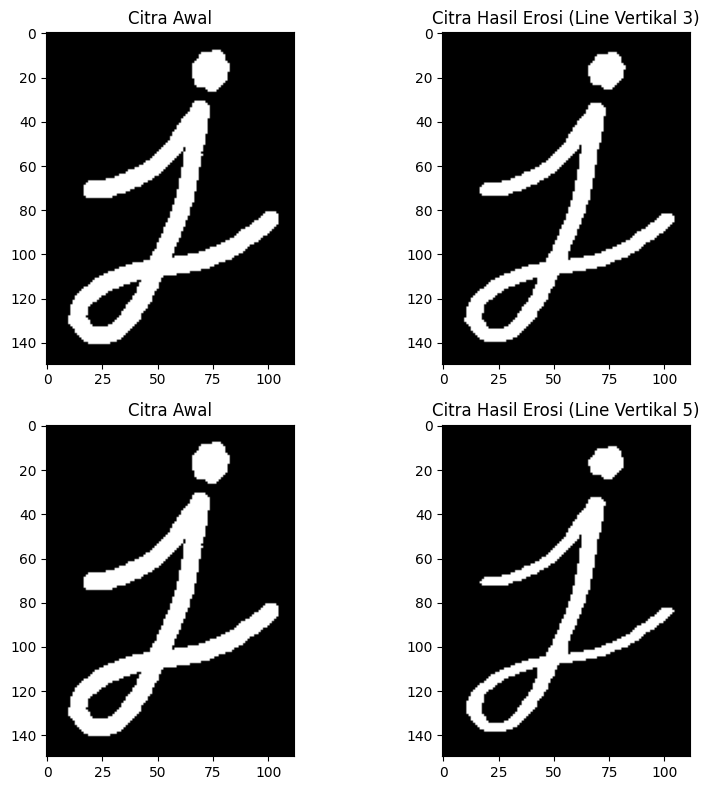

In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar dalam format grayscale
img = cv2.imread('/content/drive/MyDrive/j.png', cv2.IMREAD_GRAYSCALE)

# Membuat Structuring Element berbentuk Line Vertikal dengan panjang 3
line_kernel_3 = np.array([[1],
                          [1],
                          [1]], dtype=np.uint8)

# Membuat Structuring Element berbentuk Line Vertikal dengan panjang 5
line_kernel_5 = np.array([[1],
                          [1],
                          [1],
                          [1],
                          [1]], dtype=np.uint8)

# Melakukan operasi erosi dengan Line Vertikal 3
erosion_line_3 = cv2.erode(img, line_kernel_3)

# Melakukan operasi erosi dengan Line Vertikal 5
erosion_line_5 = cv2.erode(img, line_kernel_5)

# Menampilkan hasil dengan urutan yang sesuai
plt.figure(figsize=(12, 8))

# Tampilan untuk Line Vertikal 3
plt.subplot(232), plt.imshow(img, cmap='gray'), plt.title('Citra Awal')
plt.subplot(233), plt.imshow(erosion_line_3, cmap='gray'), plt.title('Citra Hasil Erosi (Line Vertikal 3)')

# Tampilan untuk Line Vertikal 5
plt.subplot(235), plt.imshow(img, cmap='gray'), plt.title('Citra Awal')
plt.subplot(236), plt.imshow(erosion_line_5, cmap='gray'), plt.title('Citra Hasil Erosi (Line Vertikal 5)')

plt.tight_layout()
plt.show()
